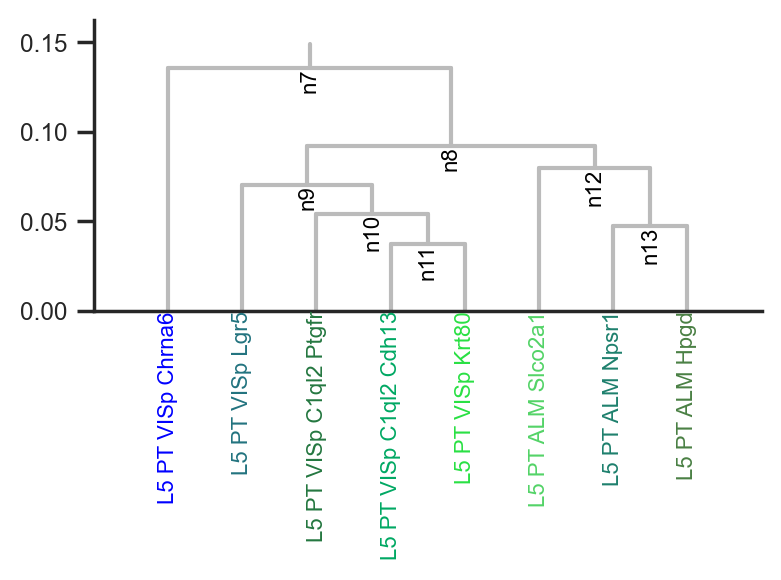

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from rich import print as pprint

from ctree.analysis_tree_helpers import HTree, calculate_cophenetic_distance, calculate_wasserstein_distance
from ctree.utils import get_path

custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", font_scale=0.8, rc=custom_params)
%config InlineBackend.figure_format="retina"

# Load a tree from the .csv file
htree = HTree(htree_file=get_path() + "/data/tree_20180520.csv")

# we'll work with a smaller subtree - n7 refers to a subset of excitatory cells:
subtree = htree.get_subtree(node="n7")
subtree.plot((4, 2), fontsize=8)

In [2]:
df_distance = calculate_cophenetic_distance(subtree=subtree)
subtree_df = subtree.obj2df()

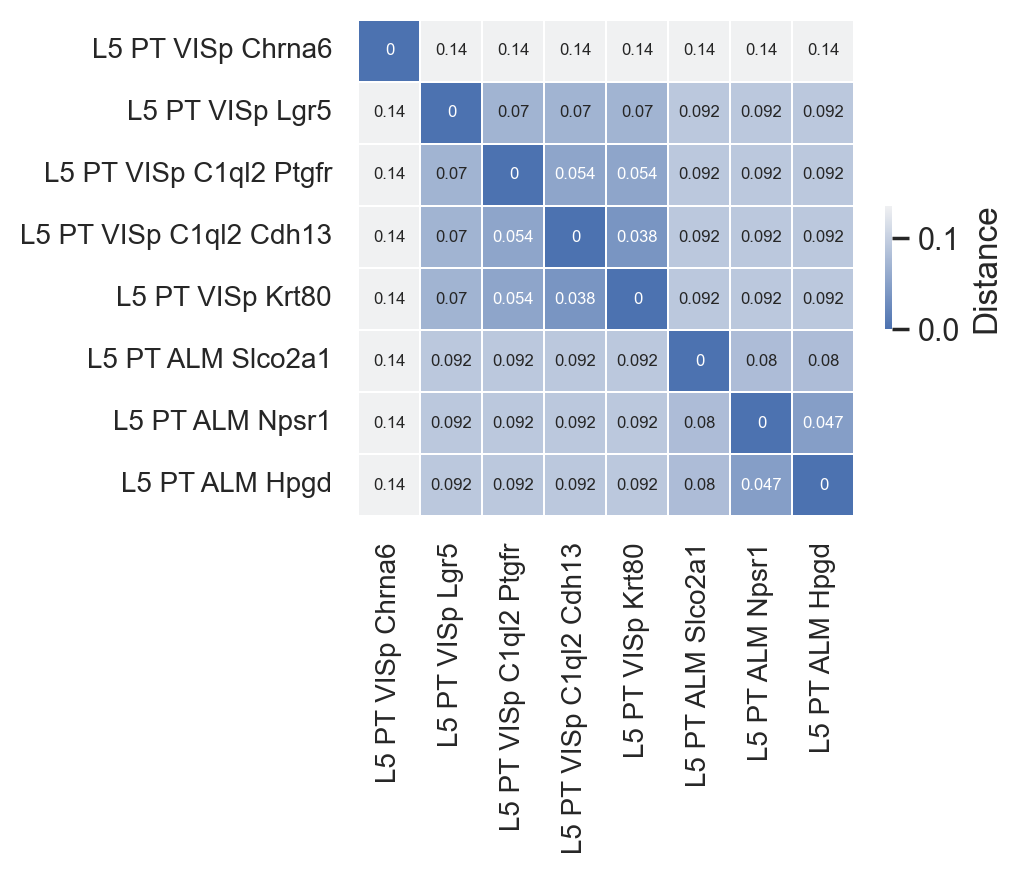

In [3]:
sns.set()
f, ax = plt.subplots(1, 1, figsize=(4, 4))
ax = sns.heatmap(
    df_distance,
    vmin=0,
    vmax=subtree_df["y"].max(),
    xticklabels=True,
    yticklabels=True,
    square=True,
    linewidths=0.1,
    cmap=sns.color_palette("light:b_r", as_cmap=True),
    cbar_kws={"shrink": 0.2, "orientation": "vertical", "label": "Distance"},
    annot=True,
    annot_kws={"size": 6},
)
# set tick labels to be the same size
ax.set_xticklabels(ax.get_xticklabels(), fontsize=10)
ax.set_yticklabels(ax.get_yticklabels(), fontsize=10)
plt.show()

#### Calculating Wasserstein distance between probability distributions over labels.

 - We have two probability distributions $P$ and $Q$, over categorical labels $L$. 
 - These are column vectors of length $|L|$.
 - Cost to move mass from label $i$ to $j$ is given by the cophenetic distance $D[i,j]$.
 - The optimal transport plan is the one that minimizes the cost of transporting $P$ to $Q$
 - The wasserstein distance is the minimum cost of transporting $P$ to $Q$ over all possible plans. 

In [4]:
# A simple example: 
P = np.array([0.4,0.4,0.2])
Q = np.array([1.0,0.0,0.0])
D = np.array([[0,1.0,2.0],[1.0,0,1.0],[2.0,1.0,0]])

# Distance matrix

pprint("P \n",P)
pprint("Q \n",Q)
pprint("Distance matrix \n",D)


T, dist = calculate_wasserstein_distance(P, Q, D)
pprint("Transport plan \n",T)
pprint("Wasserstein distance \n",dist)


P 
 [0.4 0.4 0.2]

Q 
 [1. 0. 0.]

Distance matrix 
 [[0. 1. 2.]
 [1. 0. 1.]
 [2. 1. 0.]]

Transport plan 
 [[ 0.4  0.   0. ]
 [ 0.4 -0.   0. ]
 [ 0.2  0.  -0. ]]

Wasserstein distance 
 0.8

In [5]:
# exmaple with label set in the subtree.

unique_labels = df_distance.columns.values
P = np.random.rand(len(unique_labels))
P = P / np.sum(P)  # for valid probability distribution

Q = np.random.rand(len(unique_labels))
Q = Q / np.sum(Q)  # for valid probability distribution

D = df_distance.values

In [6]:
T, dist = calculate_wasserstein_distance(P, Q, D)

[0.0791185  0.08834949 0.15475148 0.11678505 0.1080867  0.13622456
 0.15253528 0.16414893]

[0.0094761  0.18181568 0.08237773 0.24038597 0.20972476 0.03769087
 0.17226235 0.06626654]

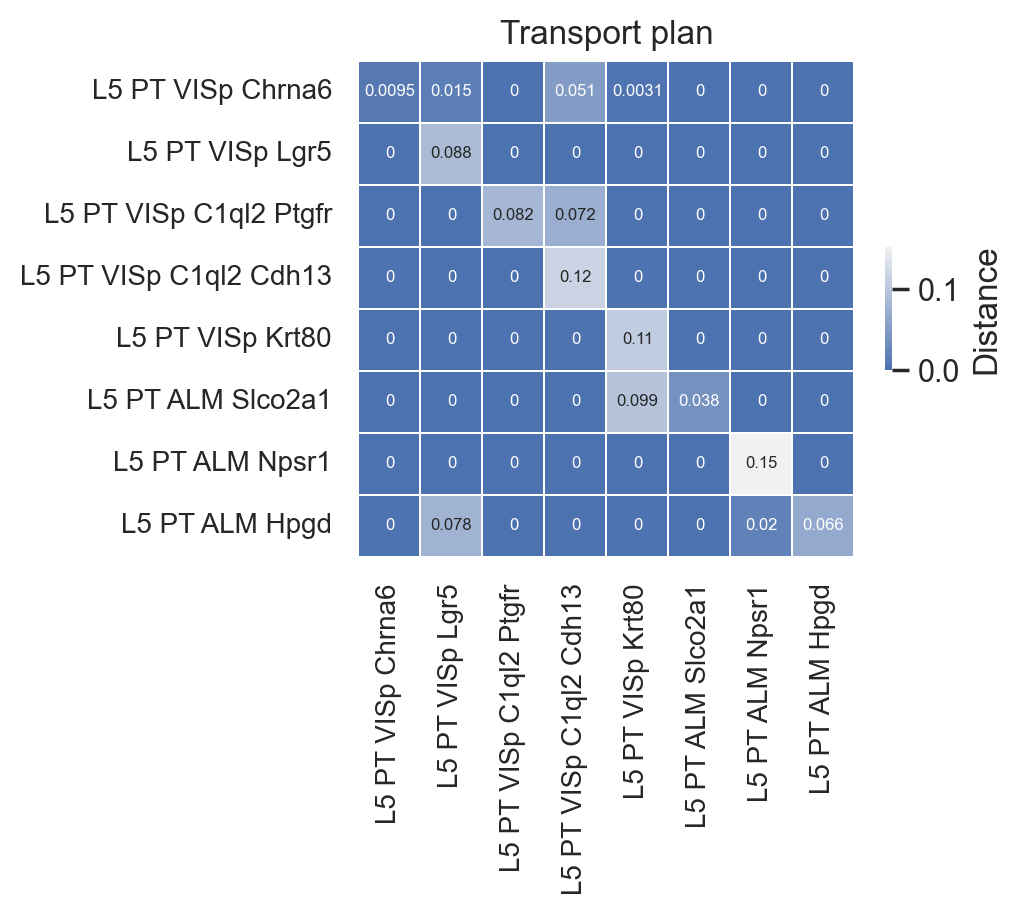

Wasserstein distance: 0.0306


In [7]:
pprint(P)
pprint(Q)
T_df = pd.DataFrame(T, index=unique_labels, columns=unique_labels)

sns.set()
f, ax = plt.subplots(1, 1, figsize=(4, 4))
ax = sns.heatmap(
    T_df,
    vmin=0,
    vmax=T_df.max().max(),
    xticklabels=True,
    yticklabels=True,
    square=True,
    linewidths=0.1,
    cmap=sns.color_palette("light:b_r", as_cmap=True),
    cbar_kws={"shrink": 0.2, "orientation": "vertical", "label": "Distance"},
    annot=True,
    annot_kws={"size": 6},
)
# set tick labels to be the same size
ax.set_xticklabels(ax.get_xticklabels(), fontsize=10)
ax.set_yticklabels(ax.get_yticklabels(), fontsize=10)
ax.set_title("Transport plan")
plt.show()

print(f"Wasserstein distance: {dist:0.4f}")